In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [4]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [5]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)#划分组数
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# 从数据可视化中获得洞见

In [7]:
housing = strat_train_set.copy()

## 将地理数据可视化

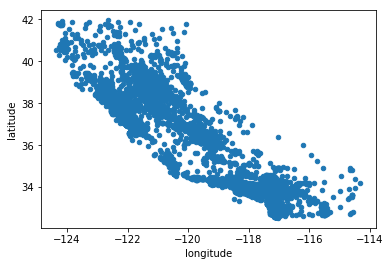

In [8]:
# 只是地理分布
%matplotlib inline
housing.plot(kind="scatter", x="longitude", y="latitude")

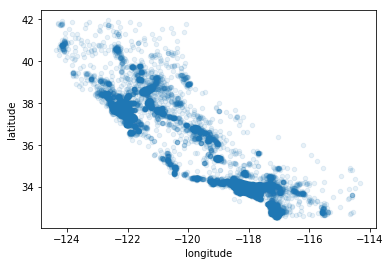

In [9]:
# 地理分布突出高密度
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

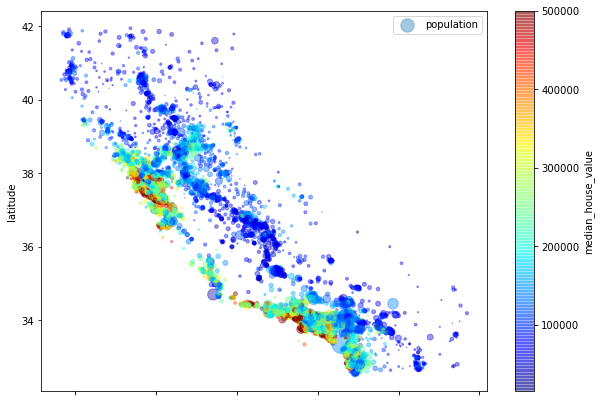

In [10]:
#观测房价，每个圆半径代表每个地区的人口数量（s），颜色代表价格（c），使用jet的预定义颜色表（cmap）
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s = housing["population"]/100, label="population", figsize=(10,7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
)
plt.legend()



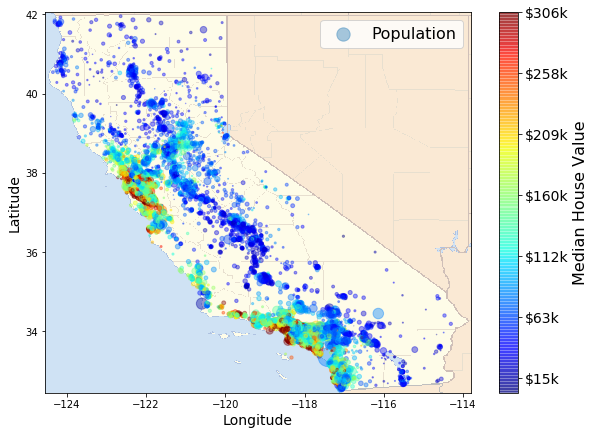

In [11]:
#加载加利福尼亚州地理图
#使用自定义的colobar，设置分层和坐标刻度
import matplotlib.image as mpimg
california_img=mpimg.imread('california.png')
fuck_x = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)#在指定的间隔内返回均匀间隔的数字，num：11生成样本数
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)#设置坐标刻度
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)

plt.show()

# 寻找相关性

In [13]:
### 使用correct（）方法计算出每对属性之间的标准相关系数（皮尔逊系数）
#相关系数仅测量线性相关性
corr_matrix = housing.corr()

In [14]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CBDCF0CDA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002CBDE9927F0>]], dtype=object)

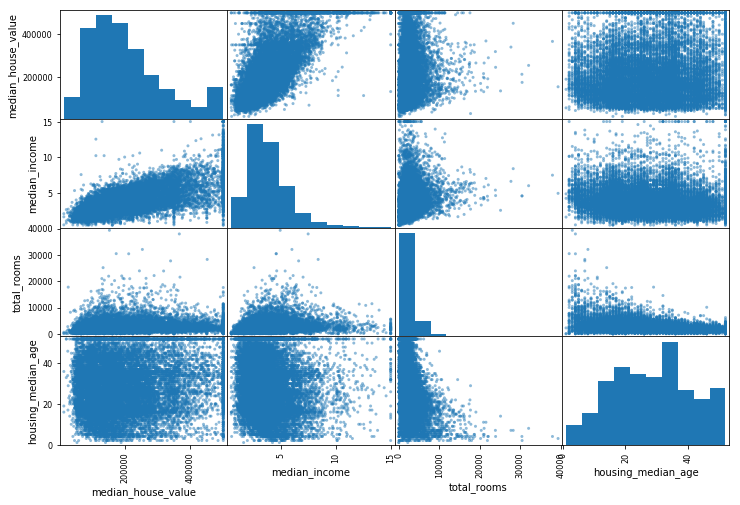

In [18]:
#还有种方法可以检测属性之间的相关性，使用scatter_matrix()
#绘制出每个数值属性相对于其他数值属性的相关性
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

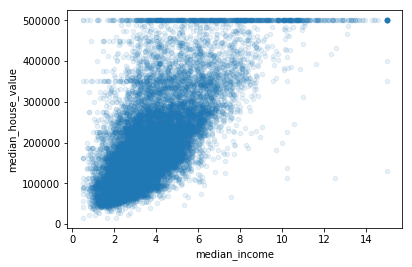

In [20]:
#最具潜力的应该是收入中位数
housing.plot(kind="scatter", x="median_income", y = "median_house_value", alpha=0.1)

# 验证不同的属性组合

In [22]:
housing["room_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedroom_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
room_per_household          0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_room           -0.259984
Name: median_house_value, dtype: float64

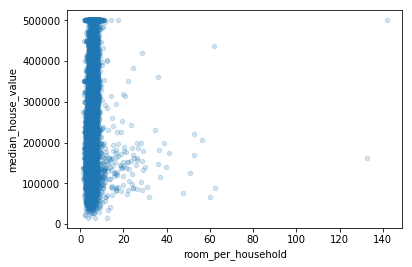

In [26]:
housing.plot(kind="scatter", x="room_per_household", y="median_house_value", alpha=0.2)
#plt.axis([0, 5, 0, 520000])
plt.show()

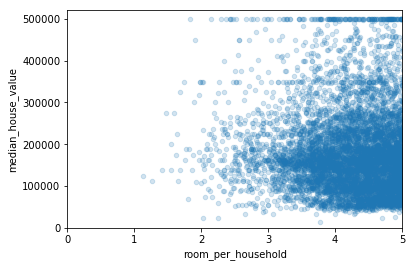

In [27]:
housing.plot(kind="scatter", x="room_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()